## Product Substitute Prediction

In many product based websites, there are certain products that users prefer which could be out of stock. In such scenarios, substitute products can solve the user's preference of choosing. The goal of the project is to predict a substitute relationshop between a pair of products. 

### __Datasets and Files:__

* __dataset_metadata.csv__: Provides detailed information about all key_ and cand_ columns in the training and test sets. Try to select some useful features to include in the model, as not all of them are suitable. `|Region Id|MarketPlace Id|Produt Id|Binding Code|binding_description|brand_code|case_pack_quantity|, ...`


* __training.csv__: Training product pairs:
> - `ID:` ID of the record
> - `label:` Tells whether the key and candidate products are substitutes (1) or not (0).
> - `product_key ...:` Key product ID features 
> - `product_candidate ...:` Candidate product ID features 


* __public_test_features.csv__: Test product pairs:
> - `ID:` ID of the record
> - `product_key ...:` Key product ID features 
> - `product_candidate ...:` Candidate product ID features 

In [1]:
#Upgrade dependencies
!pip install --upgrade pip
!pip install --upgrade scikit-learn

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages (20.1.1)
Requirement already up-to-date: scikit-learn in /home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages (0.23.1)


## 1. <a name="1">Read the datasets</a> (Given)
(<a href="#0">Go to top</a>)

The datasets is read into dataframes, using Pandas.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
  
training_data = pd.read_csv('C:/Users/SwetaMankala/Desktop/Courses/Prep/training.csv')
test_data = pd.read_csv('C:/Users/SwetaMankala/Desktop/Courses/Prep/public_test_features.csv')

print('The shape of the training dataset is:', training_data.shape)
print('The shape of the test dataset is:', test_data.shape)


The shape of the training dataset is: (36803, 228)
The shape of the test dataset is: (15774, 227)


## 2. <a name="2">Train a classifier</a> (Implement)
(<a href="#0">Go to top</a>)

 * <a href="#21">Exploratory Data Analysis</a>
 * <a href="#22">Select features to build the model</a>
 * <a href="#23">Data processing</a>
 * <a href="#24">Model training</a>

### 2.1 <a name="21">Exploratory Data Analysis</a> 
(<a href="#2">Go to Train a classifier</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [2]:
# Print the first five rows
# NaN means missing data
training_data.head()

,ID,label,key_Region Id,key_MarketPlace Id,product_key,key_Binding Code,key_binding_description,key_brand_code,key_case_pack_quantity,key_classification_code,...,cand_pkg_weight,cand_pkg_weight_uom,cand_pkg_width,cand_release_date_embargo_level,cand_dw_creation_date,cand_dw_last_updated,cand_is_deleted,cand_last_updated,cand_version,cand_external_testing_certification
0,34016,0,1,1,B00YCZ6IKA,kitchen,Kitchen,NICLW,NaN,base_product,...,0.529104,pounds,5.118110,NaN,18-Apr-13,14-Oct-17,N,13-Oct-17,2867,NaN
1,3581,0,1,1,B00U25WT7A,office_product,Office Product,NaN,NaN,base_product,...,0.100000,pounds,4.500000,NaN,19-May-16,21-Mar-18,N,20-Mar-18,65,NaN
2,36025,1,1,1,B011BZ3GXU,consumer_electronics,Electronics,NaN,NaN,base_product,...,0.654773,pounds,3.937008,NaN,10-Dec-15,16-Feb-18,N,15-Feb-18,1532,NaN
3,42061,1,1,1,B0089XDG3I,pc,Personal Computers,NaN,NaN,base_product,...,3.549442,pounds,10.314961,NaN,19-Oct-12,15-Feb-18,N,14-Feb-18,13964,NaN
4,14628,1,1,1,B014UTSBZW,miscellaneous,Misc.,ZUKC7,1.0,base_product,...,0.396832,pounds,5.196850,NaN,26-Jul-12,9-Mar-18,N,9-Mar-18,1253,NaN


In [4]:
print('The shape of the dataset is:', training_data.shape)

The shape of the dataset is: (36803, 228)


In [5]:
# Let's see the data types and non-null values for each column
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36803 entries, 0 to 36802
Columns: 228 entries, ID to cand_external_testing_certification
dtypes: float64(90), int64(12), object(126)
memory usage: 64.0+ MB


In [3]:
# This prints basic statistics for numerical columns
training_data.describe()

,ID,label,key_Region Id,key_MarketPlace Id,key_case_pack_quantity,key_country_of_origin,key_discontinued_date,key_ean,key_excluded_direct_browse_node_id,key_fedas_id,...,cand_recall_notice_receive_date,cand_unit_count,cand_upc,cand_variation_theme_id,cand_video_game_region,cand_pkg_height,cand_pkg_length,cand_pkg_weight,cand_pkg_width,cand_version
count,36803.000000,36803.000000,36803.0,36803.0,16508.000000,0.0,0.0,3.338900e+04,1.013200e+04,33.0,...,0.0,4751.000000,2.710200e+04,14347.000000,14.000000,29405.000000,29405.000000,29135.000000,29405.000000,36803.000000
mean,26341.493438,0.505095,1.0,1.0,9.828326,NaN,NaN,1.704341e+12,1.931567e+09,100954.0,...,NaN,46.670352,6.207087e+11,36.932808,1.428571,3.497030,12.478694,5.806474,7.670509,11493.830014
std,15159.339391,0.499981,0.0,0.0,72.961235,NaN,NaN,2.406681e+12,3.543757e+09,0.0,...,NaN,746.862227,2.750673e+11,91.314273,0.851631,3.773179,11.434224,27.061422,5.980064,75595.969332
min,1.000000,0.000000,1.0,1.0,0.000000,NaN,NaN,1.427901e+07,1.722820e+05,100954.0,...,NaN,0.000000,5.012000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,13250.500000,0.000000,1.0,1.0,1.000000,NaN,NaN,6.460000e+11,1.064954e+06,100954.0,...,NaN,1.000000,6.130000e+11,2.000000,1.000000,1.100000,6.300000,0.250000,3.818898,53.000000
50%,26318.000000,1.000000,1.0,1.0,1.000000,NaN,NaN,7.570000e+11,1.657930e+08,100954.0,...,NaN,1.000000,7.160000e+11,8.000000,1.000000,2.400000,9.200000,0.750000,5.905512,195.000000
75%,39455.500000,1.000000,1.0,1.0,6.000000,NaN,NaN,8.810000e+11,2.445458e+09,100954.0,...,NaN,12.000000,7.940000e+11,24.000000,1.000000,4.330709,14.100000,2.802126,9.900000,1175.000000
max,52576.000000,1.000000,1.0,1.0,1700.000000,NaN,NaN,9.830000e+12,1.634073e+10,100954.0,...,NaN,50000.000000,1.000000e+12,1437.000000,3.000000,74.000000,202.400000,2322.000000,97.000000,635453.000000


#### Target distribution

Let's check our target distribution.

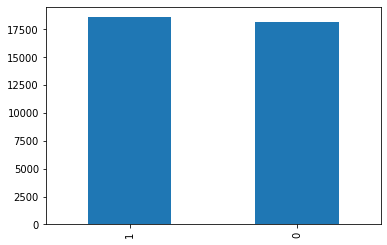

In [7]:
import matplotlib.pyplot as plt

training_data['label'].value_counts().plot.bar()
plt.show()

In [4]:
import numpy as np
print('Numerical columns:',training_data.select_dtypes(include=np.number).columns)
print('Categorical columns:',training_data.select_dtypes(include='object').columns)

Numerical columns: Index(['ID', 'label', 'key_Region Id', 'key_MarketPlace Id',
       'key_case_pack_quantity', 'key_country_of_origin',
       'key_discontinued_date', 'key_ean',
       'key_excluded_direct_browse_node_id', 'key_fedas_id',
       ...
       'cand_recall_notice_receive_date', 'cand_unit_count', 'cand_upc',
       'cand_variation_theme_id', 'cand_video_game_region', 'cand_pkg_height',
       'cand_pkg_length', 'cand_pkg_weight', 'cand_pkg_width', 'cand_version'],
      dtype='object', length=102)
Categorical columns: Index(['product_key', 'key_Binding Code', 'key_binding_description',
       'key_brand_code', 'key_classification_code',
       'key_classification_description', 'key_color_map',
       'key_cpsia_cautionary_statement', 'key_creation_date',
       'key_currency_code',
       ...
       'cand_wireless_provider', 'cand_wireless_provider_code',
       'cand_pkg_dimensional_uom', 'cand_pkg_weight_uom',
       'cand_release_date_embargo_level', 'cand_dw_creatio

### 2.2 <a name="22">Select features to build the model</a> 
(<a href="#2">Go to Train a classifier</a>)

For a start, we recommended using only a few of the numerical features for both key_ and cand_ Ids: __item_package_quantity__, __item_height__, __item_width__, __item_length__, __item_weight__, __pkg_height__, __pkg_width__, __pkg_length__, __pkg_weight__.

Remember to: (a) check for and impute missing values, and (b) scale the numerical features before training the model, as KNN is sensitive to features scales.

In [9]:
# Grab model features/inputs and target/output
numerical_features = ["key_item_package_quantity", 
                      "key_item_height", "key_item_width", "key_item_length", "key_item_weight", 
                      "key_pkg_height", "key_pkg_width", "key_pkg_length", "key_pkg_weight",
                      "cand_item_package_quantity", 
                      "cand_item_height", "cand_item_width", "cand_item_length", "cand_item_weight", 
                      "cand_pkg_height", "cand_pkg_width", "cand_pkg_length", "cand_pkg_weight"]

categorical_features = ["key_classification_code", "key_has_ean", "key_has_online_play", 
                      "cand_classification_code", "cand_has_ean", "cand_has_online_play"]

text_features = ["key_item_name", "cand_item_name"]

model_features = numerical_features + categorical_features + text_features

model_target = 'label'

### 2.3 <a name="23">Data Processing</a> 
(<a href="#2">Go to Train a classifier</a>)


#### [Cleaning numerical features]

#### Cleaning categorical features 

Let's also examine the categorical features.

In [10]:
training_data[categorical_features + text_features] = training_data[categorical_features + text_features].astype('str')
test_data[categorical_features + text_features] = test_data[categorical_features + text_features].astype('str')

#### Cleaning text features 

Also a good idea to look at the text fields. Text cleaning can be performed here, before train/test split, with less code.

In [11]:
# Prepare cleaning functions
import re, string
import nltk
from nltk.stem import SnowballStemmer

stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

stemmer = SnowballStemmer('english')

def preProcessText(text):
    # lowercase and strip leading/trailing white space
    text = text.lower().strip()
    
    # remove HTML tags
    text = re.compile('<.*?>').sub('', text)
    
    # remove punctuation
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    
    # remove extra white space
    text = re.sub('\s+', ' ', text)
    
    return text

def lexiconProcess(text, stop_words, stemmer):
    filtered_sentence = []
    words = text.split(" ")
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(stemmer.stem(w))
    text = " ".join(filtered_sentence)
    
    return text

def cleanSentence(text, stop_words, stemmer):
    return lexiconProcess(preProcessText(text), stop_words, stemmer)

# Clean the text features
for c in text_features:
    print('Text cleaning: ', c)
    training_data[c] = [cleanSentence(item, stop_words, stemmer) for item in training_data[c].values]
    test_data[c] = [cleanSentence(item, stop_words, stemmer) for item in test_data[c].values]

Text cleaning:  key_item_name
Text cleaning:  cand_item_name


#### Training and validation datasets

We split our dataset into training (90%) and validation(10%) subsets using sklearn's [__train_test_split()__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. We use the validation set to check trained model performance on before submitting the test predictions to the leaderboard (to have a better idea of what to expect leaderboard performance-wise).

In [12]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(training_data, test_size=0.1, shuffle=True, random_state=23)

#### Data processing with Pipeline

Let's build a more complex pipeline today. We first build separate pipelines to handle the numerical, categorical, and text features, and then combine them into a composite pipeline along with an estimator, a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) here.

   * For the numerical features pipeline, the __numerical_processor__ below, we impute missing values with the mean using sklearn's SimpleImputer, followed by a MinMaxScaler (don't have to scale features when using Decision Trees, but it's a good idea to see how to use more data transforms). If different processing is desired for different numerical features, different pipelines should be built - just like shown below for the two text features.
   
   
   * In the categoricals pipeline, the __categorical_processor__ below, we impute with a placeholder value (no effect here as we already encoded the 'nan's), and encode with sklearn's OneHotEncoder. If computing memory is an issue, it is a good idea to check categoricals' unique values, to get an estimate of many dummy features will be created by one-hot encoding. Note the __handle_unknown__ parameter that tells the encoder to ignore (rather than throw an error for) any unique value that might show in the validation/and or test set that was not present in the initial training set.
  
   
   * And, finally, also with memory usage in mind, we build two more pipelines, one for each of our text features.    
   
The selective preparations of the dataset features are then put together into a collective ColumnTransformer, to be finally used in a Pipeline along with an estimator. This ensures that the transforms are performed automatically on the raw data when fitting the model and when making predictions, such as when evaluating the model on a validation dataset via cross-validation or making predictions on a test dataset in the future.

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
#    ('num_scaler', MinMaxScaler()) # Shown in case is needed, not a must with Decision Trees
                                ])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
#    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Shown in case is needed, no effect here as we already imputed with 'nan' strings
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
                                ])

# Preprocess 1st text feature
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(binary=True, max_features=50))
                                ])

# Preprocess 2nd text feature (larger vocabulary)
text_precessor_1 = Pipeline([
    ('text_vect_1', CountVectorizer(binary=True, max_features=50))
                                ])

# Combine all data preprocessors from above (add more, if you choose to define more!)
# For each processor/step specify: a name, the actual process, and finally the features to be processed
data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features),
    ('categorical_pre', categorical_processor, categorical_features),
    ('text_pre_0', text_processor_0, text_features[0]),
    ('text_pre_1', text_precessor_1, text_features[1])
                                    ]) 

### PIPELINE ###
################

# Pipeline desired all data transformers, along with an estimator at the end
# Later you can set/reach the parameters using the names issued - for hyperparameter tuning, for example
pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', DecisionTreeClassifier())
                    ])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['key_item_package_quantity',
                                                   'key_item_height',
                                                   'key_item_width',
                                                   'key_item_length',
                                                   'key_item_weight',
                                                   'key_pkg_height',
                                                   'key_pkg_width',
                                                   'key_pkg_length',
                                                   'key_pkg_weight',
                                                   'cand_item_package_quantity',
                                                   'cand_item_height...
                                                   'key_has_ean',
                                                   'key_has_online_play',
                                                   'cand_classification_code',
                                                   'cand_has_ean',
                                                   'cand_has_online_play']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'key_item_name'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'cand_item_name')])),
                ('dt', DecisionTreeClassifier())])

### 2.4 <a name="24">Model training</a> 
(<a href="#2">Go to Train a classifier</a>)


In [14]:
# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['key_item_package_quantity',
                                                   'key_item_height',
                                                   'key_item_width',
                                                   'key_item_length',
                                                   'key_item_weight',
                                                   'key_pkg_height',
                                                   'key_pkg_width',
                                                   'key_pkg_length',
                                                   'key_pkg_weight',
                                                   'cand_item_package_quantity',
                                                   'cand_item_height...
                                                   'key_has_ean',
                                                   'key_has_online_play',
                                                   'cand_classification_code',
                                                   'cand_has_ean',
                                                   'cand_has_online_play']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'key_item_name'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'cand_item_name')])),
                ('dt', DecisionTreeClassifier())])

#### Evaluate the performance of the trained classifier on the training and validation datasets

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted model to make predictions on the train dataset
# Train data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
train_predictions = pipeline.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

# Use the fitted model to make predictions on the validation dataset
X_val = val_data[model_features]
y_val  = val_data[model_target]

val_predictions = pipeline.predict(X_val)

print('Model performance on the validation set:')
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Validation accuracy:", accuracy_score(y_val, val_predictions))

Model performance on the train set:
[[16339    64]
 [  219 16500]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     16403
           1       1.00      0.99      0.99     16719

    accuracy                           0.99     33122
   macro avg       0.99      0.99      0.99     33122
weighted avg       0.99      0.99      0.99     33122

Train accuracy: 0.9914558299619588
Model performance on the validation set:
[[1051  760]
 [ 743 1127]]
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1811
           1       0.60      0.60      0.60      1870

    accuracy                           0.59      3681
   macro avg       0.59      0.59      0.59      3681
weighted avg       0.59      0.59      0.59      3681

Validation accuracy: 0.5916870415647921


#### Hyperparameter Tuning

We next use sklearn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to look for hyperparameter combinations to improve the accuracy on the test set (and reduce the generalization gap). As GridSearchCV does cross-validation train-validation split internally, 
our data transformers inside the Pipeline context will force the correct behavior of learning data transformations on the training set, and applying the transformations to the validation set when cross-validating, as well as on the test set later when running test predictions.

Also, Pipeline's steps names give easy access to hyperparameters for hyperparameter tuning while cross-validating. Parameters of the estimators in the pipeline can be accessed using the __estimator__ __ __parameter__ syntax. Note the __double underscores__ connecting the __estimator__ and __parameter__!

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### PIPELINE GRID_SEARCH ###
############################

# Parameter grid for GridSearch
param_grid={'dt__max_depth': [10, 20, 30],#, 50, 75, 100, 125, 150, 200, 250], 
            'dt__min_samples_leaf': [1, 2, 5],#, 25, 30],
            'dt__min_samples_split': [10, 20, 30]#, 25, 30, 45, 50]
           }

grid_search = GridSearchCV(pipeline, # Base model
                           param_grid, # Parameters to try
                           cv = 5, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors
                          )

# Fit the GridSearch to our training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  7.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pre',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer())]),
                                                                         ['key_item_package_quantity',
                                                                          'key_item_height',
                                                                          'key_item_width',
                                                                          'key_item_length',
                                                                          'key_item_weight',
                                                                          'key_pkg_height',
                                                                          'key_pkg_width',
                                                                          'key_pkg_length',
                                                                          'key_pkg_weight',
                                                                          'cand_item_package...
                                                                         Pipeline(steps=[('text_vect_0',
                                                                                          CountVectorizer(binary=True,
                                                                                                          max_features=50))]),
                                                                         'key_item_name'),
                                                                        ('text_pre_1',
                                                                         Pipeline(steps=[('text_vect_1',
                                                                                          CountVectorizer(binary=True,
                                                                                                          max_features=50))]),
                                                                         'cand_item_name')])),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [10, 20, 30],
                         'dt__min_samples_leaf': [1, 2, 5],
                         'dt__min_samples_split': [10, 20, 30]},
             verbose=1)

In [24]:
print(grid_search.best_params_)
print(grid_search.best_score_)

# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_

# Fit the best model to the train data once more
classifier.fit(X_train, y_train)

{'dt__max_depth': 20, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 30}
0.5925069091240542


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['key_item_package_quantity',
                                                   'key_item_height',
                                                   'key_item_width',
                                                   'key_item_length',
                                                   'key_item_weight',
                                                   'key_pkg_height',
                                                   'key_pkg_width',
                                                   'key_pkg_length',
                                                   'key_pkg_weight',
                                                   'cand_item_package_quantity',
                                                   'cand_item_height...
                                                   'cand_classification_code',
                                                   'cand_has_ean',
                                                   'cand_has_online_play']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'key_item_name'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'cand_item_name')])),
                ('dt',
                 DecisionTreeClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=30))])

## 3. <a name="3">Make predictions on the test dataset</a> (Implement)
(<a href="#0">Go to top</a>)

Use the test set to make predictions with the trained classifier.

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get test data to test the classifier
X_test = test_data[model_features]

# Use the fitted model to make predictions on the test dataset
# Test data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
test_predictions = classifier.predict(X_test)


## 4. <a name="4">Write the test predictions to a CSV file</a> (Given)
(<a href="#0">Go to top</a>)

Use the following code to write the test predictions to a CSV file. Then upload the CSV file to __https://leaderboard.corp.amazon.com/tasks/542/submit__

In [26]:
import pandas as pd

result_df = pd.DataFrame(columns=["ID", "label"])
result_df["ID"] = test_data["ID"].tolist()
result_df["label"] = test_predictions

result_df.to_csv("project_day2_result.csv", index=False)

#### Double checking predictions file - shape and IDs should match the sample_submission.csv!

In [27]:
print(result_df)

          ID  label
0      35057      0
1      41573      0
2      44029      1
3       6462      1
4      17533      0
...      ...    ...
15769  20949      0
15770   9072      1
15771  52033      1
15772  26331      0
15773  13296      0

[15774 rows x 2 columns]


In [28]:
sample_submission = pd.read_csv('../data/final_project/sample-submission.csv')
print(sample_submission)


          ID  label
0      35057    0.0
1      41573    0.0
2      44029    0.0
3       6462    0.0
4      17533    0.0
...      ...    ...
15769  20949    0.0
15770   9072    0.0
15771  52033    0.0
15772  26331    0.0
15773  13296    0.0

[15774 rows x 2 columns]


## <a name="8">Improvement ideas</a>
(<a href="#0">Go to top</a>)

* Tune K parameter: You can use the [__train_test_split()__](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function on the training set, create a validation set,  and search for optimum K value using the validation performance.
